In [2]:
import numpy as np
import pandas as pd
import geopandas
from shapely.geometry import Point
pd.set_option('display.max_columns', 30)

### Importando os arquivos

In [4]:
data = pd.read_excel('/home/igor/Data/raw/IBGE/Info Brazil by state/SP_Capital_20190823/Base informaçoes setores2010 universo SP_Capital/EXCEL/DomicilioRenda_SP1.xls')
#poly = geopandas.read_file('/home/igor/Data/raw/IBGE/35-SP_Capital.geojson')

### Definindo o padrão da coluna para inteiro

In [12]:
poly['name'] = poly['name'].astype('int64')

### Realiza o merge entre polígonos e dados

In [14]:
data_merged = poly.merge(data, 'inner', left_on = 'name', right_on = 'Cod_setor')

In [35]:
data_merged.head(2)

,id,name,description,styleUrl,Geocodigo_Município,Geocodigo_Setor,Município,Distrito,Sub_distrito,Bairro,geometry,Cod_setor,Situacao_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012,V013,V014
0,kml_1,355030804000079,<center><table><tr><th colspan='2' align='cent...,#KMLStyler1,3550308,355030804000079,SÃO PAULO,ARICANDUVA,,,"POLYGON Z ((-46.51779 -23.57947 0.00000, -46.5...",355030804000079,1,0,432103,432103,0,0,0,18,53,68,23,10,3,1,3
1,kml_2,355030804000080,<center><table><tr><th colspan='2' align='cent...,#KMLStyler1,3550308,355030804000080,SÃO PAULO,ARICANDUVA,,,"POLYGON Z ((-46.51888 -23.57967 0.00000, -46.5...",355030804000080,1,0,449239,449239,0,0,1,23,88,95,16,9,1,0,5


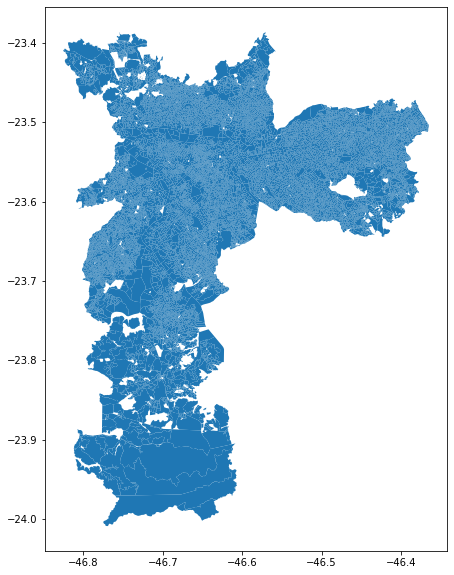

In [18]:
data_merged.plot(figsize = (20,10))

### Realizando a limpeza dos dados
Substituindo informações que possuem o valor 'X' por 0

In [19]:
data_merged['V002'] = data_merged['V002'].replace('X',0).astype('int64')

### Escala de Cores
utilizando o comando column

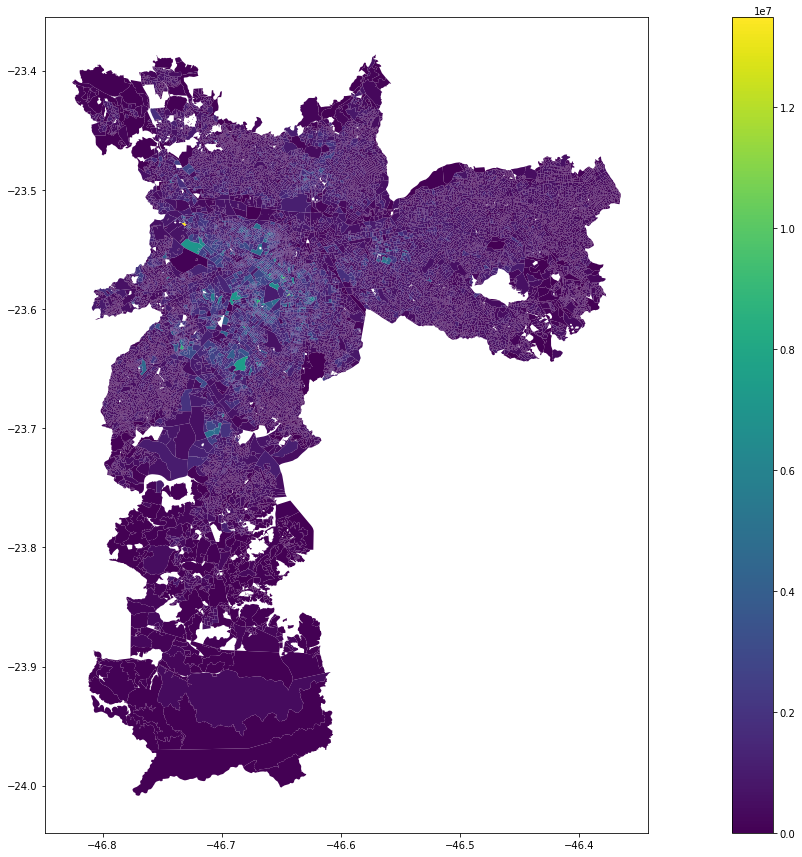

In [59]:
ax = data_merged.plot(figsize = (30,15), column = 'V002', legend = True)

## Plotando um círculo
utilizando a função Point(lng,lat).buffer(km)

In [61]:
sampleCircle = Point(-46.702389,-23.556664,1).buffer(0.01)
x,y = sampleCircle.exterior.xy

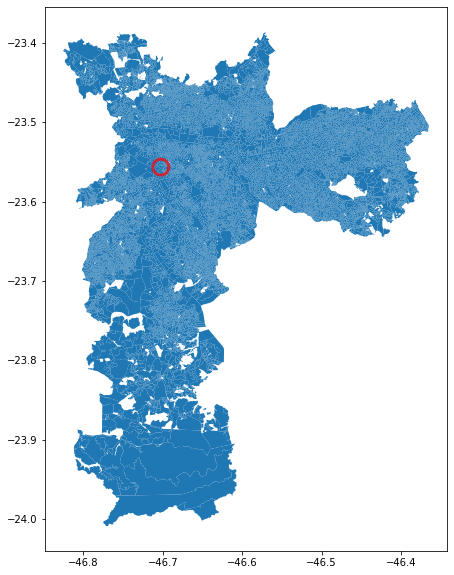

In [62]:
ax = data_merged.plot(figsize = (20,10))
ax.plot(x, y, color='red', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)

## Plotando um Ponto
No subplot criado pelo geopandas para plotar os polígonos, adicionamos mais uma plotagem com a função plot

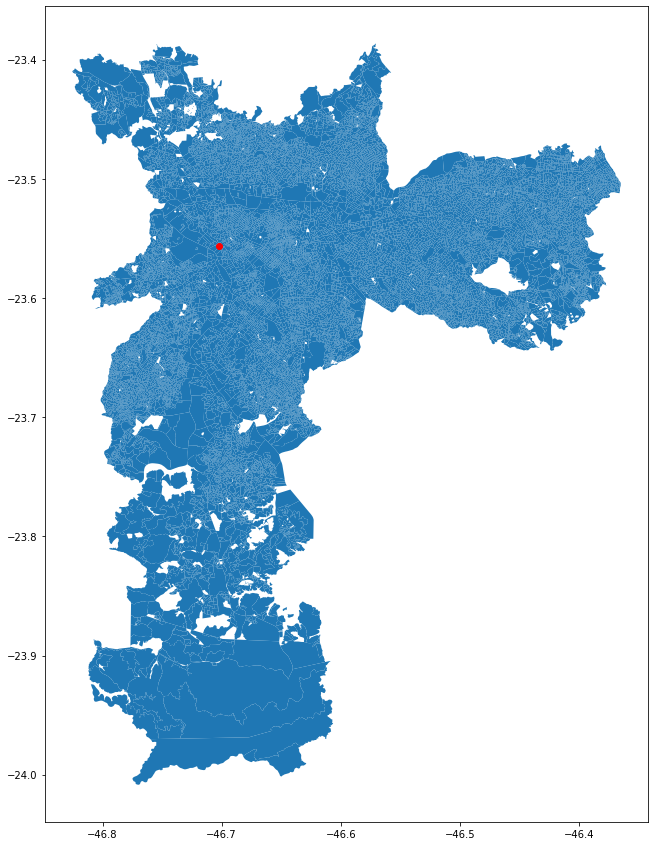

In [65]:
ax = data_merged.plot(figsize = (15,15))
ax.plot(-46.702389,-23.556664, 'bo', color='red')